# Analiza ocjene iz matematike kod djevojčica i dječaka

Analiziramo ocjene iz matematike kod djevojčica i dječaka dviju srednjih škola u Portugalu. Podatci su preuzeti sa stranice https://archive.ics.uci.edu/dataset/320/student+performance. Prikupljeni su anketiranjem slučajno odabranih učenika. Od podataka sa weba kreirat ćemo tablicu sa relevantnim varijablama za našu analizu - ocjene iz matematike djevojčica i dječaka.
Dane ocjene su u rasponu od 0 do 20, gdje je 0 najlošija, a 20 najbolja ocjena. Finalna ocjena je dana u stupcu G3.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import skew
from scipy.stats import kstest
from scipy.stats import norm
from statsmodels.stats.diagnostic import lilliefors

Učitavamo podatke preuzete sa web-a. Provjeravamo fali li unosa i jesu li uneseni podatci u dobrom rasponu.

In [2]:
path = '/Users/valentinavidovic/Documents/student-mat.csv'
dfm = pd.read_csv(path, sep=';')
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [3]:
dfm['G3'].unique()

array([ 6, 10, 15, 11, 19,  9, 12, 14, 16,  5,  8, 17, 18, 13, 20,  7,  0,
        4])

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'Medu'}>,
        <Axes: title={'center': 'Fedu'}>,
        <Axes: title={'center': 'traveltime'}>],
       [<Axes: title={'center': 'studytime'}>,
        <Axes: title={'center': 'failures'}>,
        <Axes: title={'center': 'famrel'}>,
        <Axes: title={'center': 'freetime'}>],
       [<Axes: title={'center': 'goout'}>,
        <Axes: title={'center': 'Dalc'}>,
        <Axes: title={'center': 'Walc'}>,
        <Axes: title={'center': 'health'}>],
       [<Axes: title={'center': 'absences'}>,
        <Axes: title={'center': 'G1'}>, <Axes: title={'center': 'G2'}>,
        <Axes: title={'center': 'G3'}>]], dtype=object)

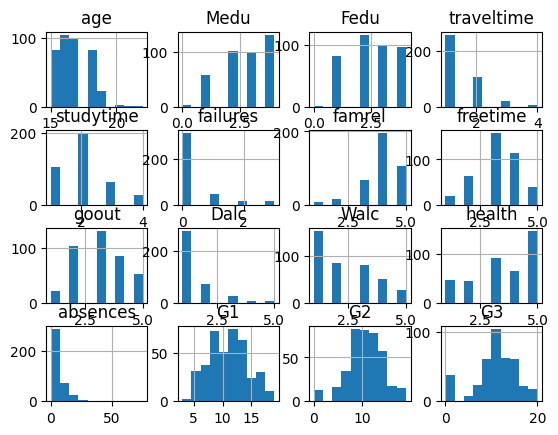

In [4]:
dfm.hist()

In [5]:
dfm['age'].unique()

array([18, 17, 15, 16, 19, 22, 20, 21])

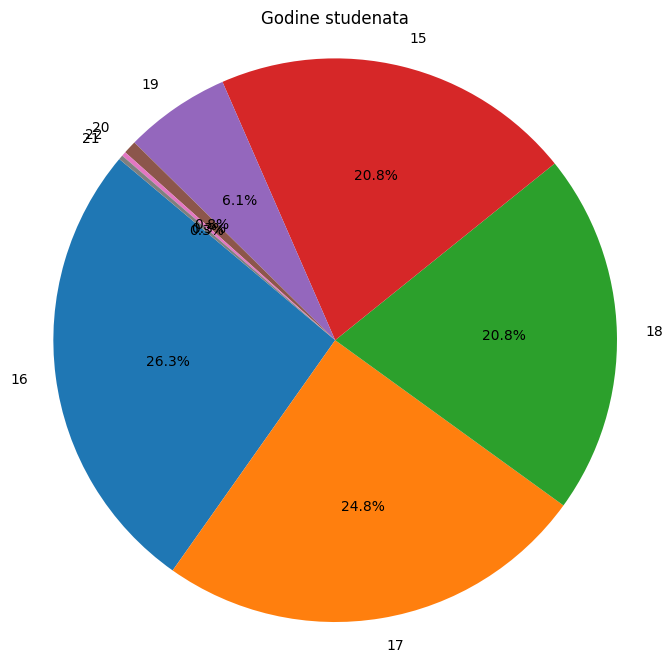

In [6]:
age_counts = dfm['age'].value_counts()
age_labels = age_counts.index
age_values = age_counts.values
plt.figure(figsize=(8, 8))
plt.pie(age_values, labels=age_labels, autopct='%1.1f%%', startangle=140)
plt.title('Godine studenata')
plt.axis('equal') 
plt.show()

Iako su godine učenika koji polaze srednje skole u Portugalu obično u rasponu od 15 do 18, moguće je da su neki od učenika ponavljali razred ili kasnije krenuli u školu pa unose gdje učenici imaju 19-22 godine nećemo smatrati greškom i ostavljamo ih u tablici.

array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'Medu'}>,
        <Axes: title={'center': 'Fedu'}>],
       [<Axes: title={'center': 'traveltime'}>,
        <Axes: title={'center': 'studytime'}>,
        <Axes: title={'center': 'failures'}>,
        <Axes: title={'center': 'famrel'}>],
       [<Axes: title={'center': 'freetime'}>,
        <Axes: title={'center': 'goout'}>,
        <Axes: title={'center': 'Dalc'}>,
        <Axes: title={'center': 'Walc'}>],
       [<Axes: title={'center': 'health'}>,
        <Axes: title={'center': 'absences'}>,
        <Axes: title={'center': 'G1'}>, <Axes: title={'center': 'G2'}>],
       [<Axes: title={'center': 'G3'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

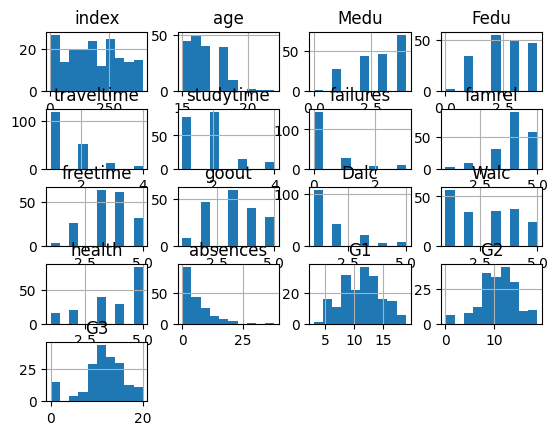

In [7]:
dfm_male = dfm[dfm['sex']=='M']
dfm_female = dfm[dfm['sex']=='F']
dfm_male = dfm_male.reset_index()
dfm_female = dfm_female.reset_index()
dfm_male.hist()

array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'Medu'}>,
        <Axes: title={'center': 'Fedu'}>],
       [<Axes: title={'center': 'traveltime'}>,
        <Axes: title={'center': 'studytime'}>,
        <Axes: title={'center': 'failures'}>,
        <Axes: title={'center': 'famrel'}>],
       [<Axes: title={'center': 'freetime'}>,
        <Axes: title={'center': 'goout'}>,
        <Axes: title={'center': 'Dalc'}>,
        <Axes: title={'center': 'Walc'}>],
       [<Axes: title={'center': 'health'}>,
        <Axes: title={'center': 'absences'}>,
        <Axes: title={'center': 'G1'}>, <Axes: title={'center': 'G2'}>],
       [<Axes: title={'center': 'G3'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

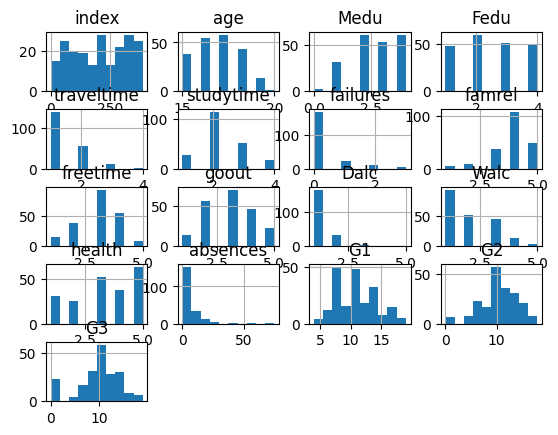

In [8]:
dfm_female.hist()

In [9]:
dfm_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       187 non-null    int64 
 1   school      187 non-null    object
 2   sex         187 non-null    object
 3   age         187 non-null    int64 
 4   address     187 non-null    object
 5   famsize     187 non-null    object
 6   Pstatus     187 non-null    object
 7   Medu        187 non-null    int64 
 8   Fedu        187 non-null    int64 
 9   Mjob        187 non-null    object
 10  Fjob        187 non-null    object
 11  reason      187 non-null    object
 12  guardian    187 non-null    object
 13  traveltime  187 non-null    int64 
 14  studytime   187 non-null    int64 
 15  failures    187 non-null    int64 
 16  schoolsup   187 non-null    object
 17  famsup      187 non-null    object
 18  paid        187 non-null    object
 19  activities  187 non-null    object
 20  nursery   

Kreiramo tablicu sa potrebnim varijablama za analizu: uspjeh na kraju školske godine iz matematike za oba spola.

In [10]:
df = dfm_male[['G3']].copy()
df['female'] = dfm_female[['G3']].copy()
df.rename(columns={
    'G3': 'male'
}, inplace = True)
df.head()

,male,female
0,15,6
1,11,6
2,19,10
3,15,15
4,14,10


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   male    187 non-null    int64
 1   female  187 non-null    int64
dtypes: int64(2)
memory usage: 3.1 KB


In [12]:
#df.to_csv('ocjene.csv', index=False)

# Opisna statistika ocjena iz matematike kod djevojčica i dječaka

In [13]:
df.describe()

,male,female
count,187.000000,187.000000
mean,10.914439,10.021390
std,4.495297,4.582526
min,0.000000,0.000000
25%,9.000000,8.000000
50%,11.000000,11.000000
75%,14.000000,13.000000
max,20.000000,19.000000


## Grafički prikaz podataka
Kreiramo stupćasti diagram frekvencija i stupćasti diagram relativnih frekvencija

array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'female'}>]], dtype=object)

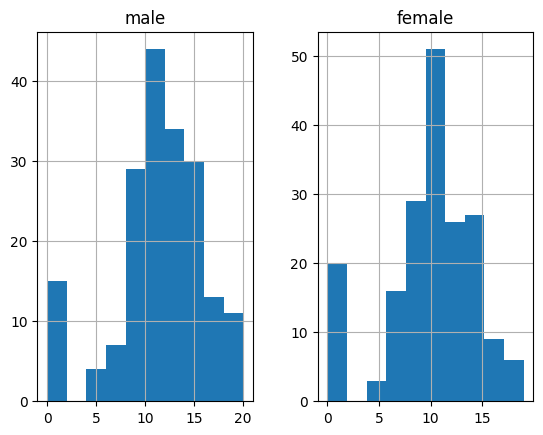

In [14]:
df.hist()

In [15]:
freq_male = df['male'].value_counts(normalize=True).sort_index()
print(freq_male)

male
0     0.080214
5     0.021390
6     0.010695
7     0.026738
8     0.096257
9     0.058824
10    0.139037
11    0.096257
12    0.106952
13    0.074866
14    0.069519
15    0.090909
16    0.053476
17    0.016043
18    0.037433
19    0.016043
20    0.005348
Name: proportion, dtype: float64


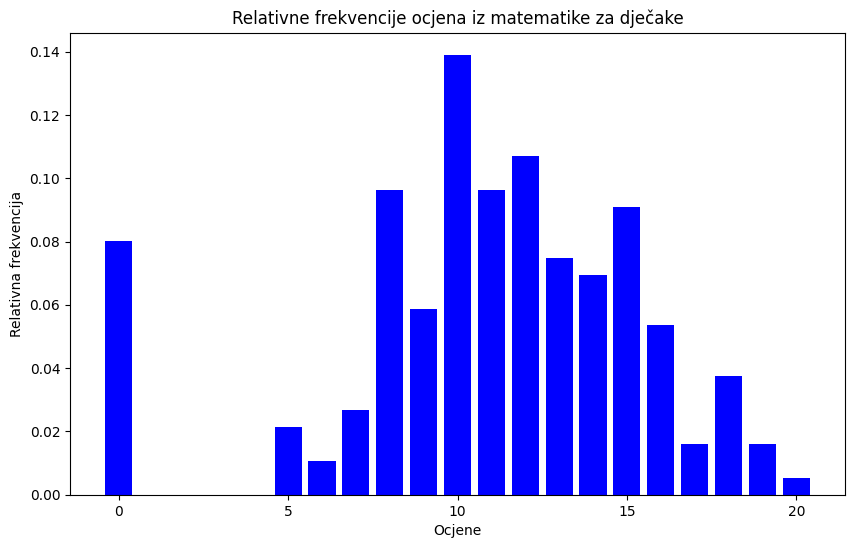

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(freq_male.index, freq_male.values, color='blue')

plt.title('Relativne frekvencije ocjena iz matematike za dječake')
plt.xlabel('Ocjene')
plt.ylabel('Relativna frekvencija')

plt.show()

In [17]:
freq_female = df['female'].value_counts(normalize=True).sort_index()
print(freq_female)

female
0     0.106952
4     0.005348
5     0.010695
6     0.064171
7     0.021390
8     0.069519
9     0.085561
10    0.128342
11    0.144385
12    0.053476
13    0.085561
14    0.074866
15    0.069519
16    0.032086
17    0.016043
18    0.026738
19    0.005348
Name: proportion, dtype: float64


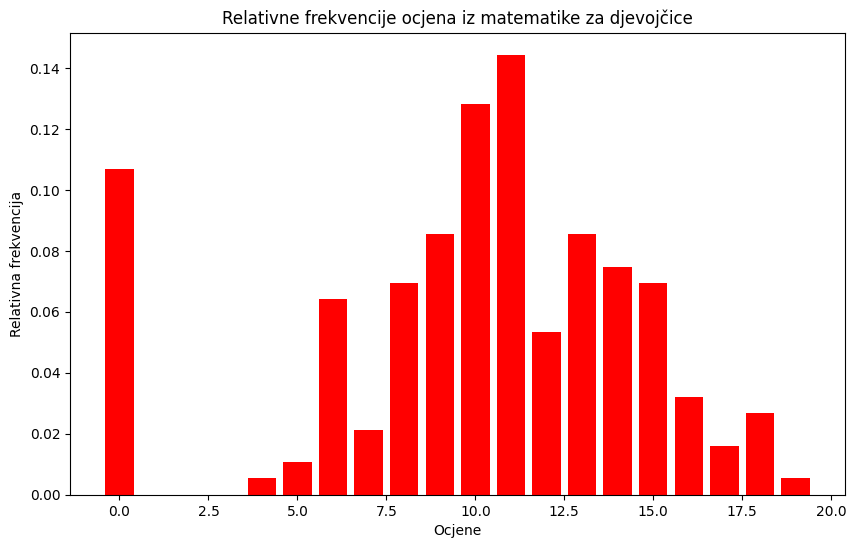

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(freq_female.index, freq_female.values, color='red')

plt.title('Relativne frekvencije ocjena iz matematike za djevojčice')
plt.xlabel('Ocjene')
plt.ylabel('Relativna frekvencija')

plt.show()

## Koeficjent asimetrije

In [19]:
skew(df['male'])

-0.7654832506097697

In [20]:
skew(df['female'])

-0.7304143564396096

Možemo vidjeti da distribucija niti jedne varijable nije simetrična i pokazuje određenu lijevostranu asimetriju, tj. koeficjent asimetrije je negativan. Također, postoji značajan broj nula koje mogu predstavljati studente koji nisu prošli ili nisu sudjelovali.

## Korelacija
Ispitajmo stupanj korelacije između ocjena dječaka i ocjena djevojčica

In [21]:
np.corrcoef(df['male'], df['female'])[0,1]

0.0864769974935014

Postoji neznačajna mala pozitivna korelacija između podataka.

## Ispitivanje normalnosti uzorka

Provodimo KS test normalnosti varijabli male i female

In [22]:
mu_male, std_male = norm.fit(df['male'])

ks_statistic, p_value = kstest(df['male'], 'norm', args=(mu_male, std_male))

print(f"KS statistic: {ks_statistic}, p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Nul hipoteza se odbacuje. Podaci nisu normalno distribuirani.")
else:
    print("Nema dovoljno dokaza za odbacivanje nul hipoteze. Podaci su normalno distribuirani.")


KS statistic: 0.12507189507664745, p-value: 0.005223627216658292
Nul hipoteza se odbacuje. Podaci nisu normalno distribuirani.


Za razinu značajnosti 0.05 odbacujemo H0, tj. hipotezu o normalnoj distribuciji ocjena dječaka.

In [23]:
mu_male, std_male = norm.fit(df['female'])

ks_statistic, p_value = kstest(df['female'], 'norm', args=(mu_male, std_male))

print(f"KS statistic: {ks_statistic}, p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Nul hipoteza se odbacuje. Podaci nisu normalno distribuirani.")
else:
    print("Nema dovoljno dokaza za odbacivanje nul hipoteze. Podaci su normalno distribuirani.")

KS statistic: 0.13449645585343917, p-value: 0.0020668910205063167
Nul hipoteza se odbacuje. Podaci nisu normalno distribuirani.


Također, odbacujemo H0, tj. hipotezu o normalnoj distribuciji ocjena djevojčica.

## Lilliefors test normalnosti

In [24]:
statistic, p_value = lilliefors(df['male'])

print("Statistika:", statistic)
print("p-vrijednost:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Nul hipoteza se odbacuje. Podaci nisu normalno distribuirani.")
else:
    print("Nema dovoljno dokaza za odbacivanje nul hipoteze. Podaci su normalno distribuirani.")

Statistika: 0.12528528355485374
p-vrijednost: 0.0009999999999998899
Nul hipoteza se odbacuje. Podaci nisu normalno distribuirani.


In [25]:
statistic, p_value = lilliefors(df['female'])

print("Statistika:", statistic)
print("p-vrijednost:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Nul hipoteza se odbacuje. Podaci nisu normalno distribuirani.")
else:
    print("Nema dovoljno dokaza za odbacivanje nul hipoteze. Podaci su normalno distribuirani.")

Statistika: 0.13450145497065913
p-vrijednost: 0.0009999999999998899
Nul hipoteza se odbacuje. Podaci nisu normalno distribuirani.
